In [2]:
import tarfile, os
from scipy import misc, signal
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
%matplotlib inline

In [3]:
#Creates a list in which each element is an array \
#representing a png file, each one enlarged by 300 percent

tar = tarfile.open("homework1_data.tar")
images = [] 

for name in tar.getnames():  
    if "Data/im" in name:
        f=tar.extractfile(name)
        fim = misc.imread(f)
        bigfim = misc.imresize(fim, 300)
        images.append(bigfim)

#plt.imshow(images[0])
#plt.show()

In [205]:
slices = []  #Takes the 0th 'slice' of each image(each of which have 4 slices)
for image in images:
    slice = image[:,:,0]
    slices.append(slice)

In [126]:
convolutions = [] #Makes an array where each element is the shift vector describing the offset of an image with the first image
for i in range (1, len(images)):
    conv = feature.register_translation(slices[0], slices[i], upsample_factor = 100)
    convolutions.append(conv)

In [196]:
shifted_images = [] #Shifts all the images after the first one based on its offset
for i in range(len(convolutions)):
    shifted_image = shift(slices[i+1], convolutions[i][0])
    shifted_images.append(shifted_image)

In [203]:
ave_total = np.zeros(shifted_images[0].shape) #Averages all the shifted images
for image in shifted_images:
    ave_total = np.add(ave_total, image)

average = np.divide(np.add(ave_total, slices[0]),100.0)

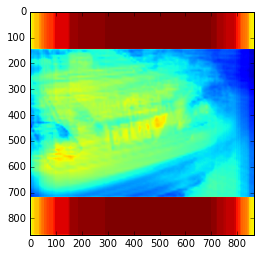

In [204]:
plt.imshow(average)